From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

## STORY:  A part of the main content of the article to be published as a piece of news.
## SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Data sets

In [369]:
df= pd.read_csv("TrainDataset1.csv")
dft= pd.read_csv("TestDataset1.csv")

In [370]:
df.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


# Checking For Null Values

In [371]:
df.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [372]:
dft.isnull().sum()

STORY    0
dtype: int64

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 2 columns):
STORY      6102 non-null object
SECTION    6102 non-null int64
dtypes: int64(1), object(1)
memory usage: 95.4+ KB


In [374]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 1 columns):
STORY    1526 non-null object
dtypes: object(1)
memory usage: 12.0+ KB


# Count Plot

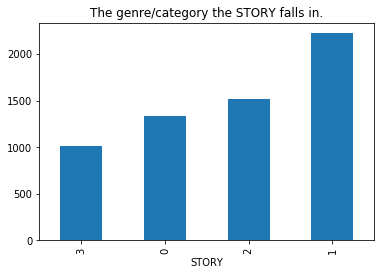

In [375]:
df.groupby('SECTION').STORY.count().sort_values().plot.bar(title= 'The genre/category the STORY falls in.')
plt.xlabel('STORY', fontsize = 10);

# Convert The columnsto necessory format

In [376]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [377]:
tfidf = TfidfVectorizer(sublinear_tf= True,
                       min_df = 5,
                       norm= 'l2',
                       ngram_range= (1,2),
                       stop_words ='english')

In [378]:
features = tfidf.fit_transform(df.STORY).toarray()

In [379]:
X1=dft['STORY']
features_t = tfidf.fit_transform(X1).toarray()

In [380]:
features_t.shape

(1526, 3890)

In [381]:
labels = df.SECTION
features.shape

(6102, 13194)

# TRain Test Split

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
X_train, X_test, y_train, y_test = train_test_split(df['STORY'], df['SECTION'],test_size=0.3, random_state= 0)

In [384]:
from sklearn.feature_extraction.text import CountVectorizer

In [385]:
count_vect = CountVectorizer()

In [386]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Linear SVC model

In [387]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [388]:
y_pred = clf.predict(count_vect.transform(X_test))

In [389]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72       424
           1       0.94      0.93      0.93       653
           2       1.00      0.35      0.52       444
           3       0.98      0.91      0.94       310

    accuracy                           0.80      1831
   macro avg       0.87      0.80      0.78      1831
weighted avg       0.88      0.80      0.79      1831



In [390]:
accuracy_score(y_test,y_pred)

0.8006553795740032

# Trying Cross Validation for this model

In [391]:
CV = 5
accuracies = cross_val_score(clf, features, labels, scoring='accuracy', cv=CV)

In [392]:
accuracies.mean()

0.9736159297547508

# Building Model using Random forest 

In [393]:
from sklearn.ensemble import RandomForestClassifier

In [394]:
clf = RandomForestClassifier(max_depth=100, random_state=42)

In [395]:
clf.fit(X_train_tfidf, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [396]:
y_pred1 = clf.predict(count_vect.transform(X_test))

In [397]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       424
           1       0.85      0.84      0.85       653
           2       0.81      0.84      0.82       444
           3       0.95      0.71      0.81       310

    accuracy                           0.83      1831
   macro avg       0.85      0.82      0.83      1831
weighted avg       0.84      0.83      0.83      1831



In [398]:
accuracy_score(y_test,y_pred1)

0.8334243582741672

# Cross Validation for this Model

In [399]:
CV = 5
accuracies = cross_val_score(clf, features, labels, scoring='accuracy', cv=CV)

In [400]:
accuracies.mean()

0.913142862635544

# Building Model using Logistic reg

In [401]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [402]:
log.fit(X_train_tfidf, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [403]:
y_pred2 = log.predict(count_vect.transform(X_test))

In [404]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56       424
           1       0.93      0.76      0.84       653
           2       1.00      0.09      0.17       444
           3       0.98      0.55      0.70       310

    accuracy                           0.62      1831
   macro avg       0.82      0.60      0.57      1831
weighted avg       0.83      0.62      0.59      1831



In [405]:
accuracy_score(y_test,y_pred2)

0.6182413981430912

# Cross Validation for this Model

In [406]:
CV = 5
accuracies = cross_val_score(log, features, labels, scoring='accuracy', cv=CV)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

In [407]:
accuracies.mean()

0.9631255903633613

After Analysing the metrics of all model we see that linear SVC model performs the best than all on test dataset

# Saving the file to csv 

In [408]:
y_pred5 = log.predict(count_vect.transform(X1))

In [409]:
file=pd.DataFrame({'SECTION':y_pred5})
file.head()
file.to_csv('submissionnews.csv',index=False)